In [28]:
import seaborn as sns
import pandas as pd

In [5]:
mpg = sns.load_dataset("mpg")
mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


# Create a visual showing the relationship between horsepower and fuel economy.

<Axes: xlabel='mpg', ylabel='horsepower'>

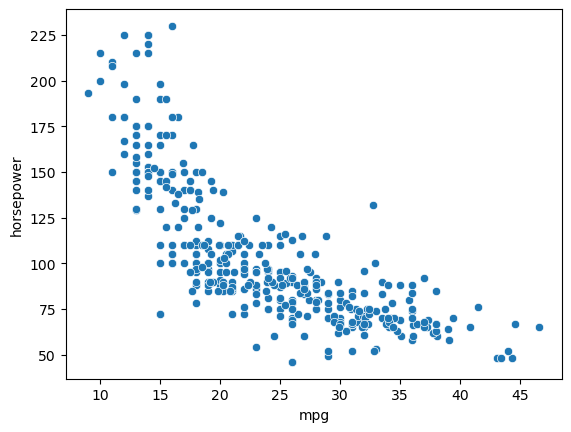

In [11]:
sns.scatterplot(data=mpg, x="mpg", y="horsepower")

### There is a negative trend between horsepower and fuel economy. As fuel economy increases, horsepower decreases generally.

# Create a table summarizing fuel economy by country of origin

In [279]:
pd.concat([mpg.groupby(by="origin")["mpg"].mean(), 
           mpg.groupby(by="origin")["mpg"].median(),
          mpg.groupby(by="origin")["mpg"].min(),
          mpg.groupby(by="origin")["mpg"].max()],
          axis=1, keys=['Mean mpg','Median mpg','Min mpg','Max mpg'])

,Mean mpg,Median mpg,Min mpg,Max mpg
origin,,,,
europe,27.891429,26.5,16.2,44.3
japan,30.450633,31.6,18.0,46.6
usa,20.083534,18.5,9.0,39.0


### Japanese cars outrank American and European cars with the best fuel economy

# Create a visual showing how fuel economy has changed over time

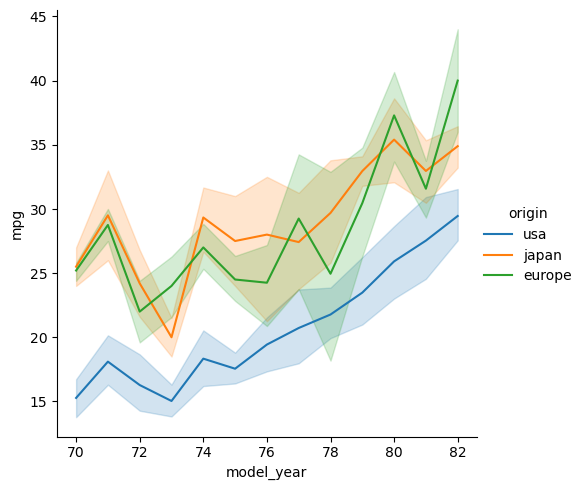

In [58]:
sns.relplot(data=mpg, x="model_year", y="mpg", hue="origin", kind="line")

### It looks that the general trend of fuel economy has increased over time.
### Japanese and European cars have had consistently better fuel economy than American-made vehicles.

# What vehicle brands produce cars with the best fuel economy and where are they from?

In [238]:
makes_avg_mpg = mpg.groupby(['make','origin'])["mpg"].mean().sort_values(ascending=False).head(5)
makes_avg_mpg = makes_avg_mpg.reset_index()
makes_avg_mpg

,make,origin,mpg
0,vw,europe,39.016667
1,nissan,japan,36.000000
2,triumph,europe,35.000000
3,honda,japan,33.761538
4,renault,europe,32.880000


[Text(0, 0.5, 'Average mpg')]

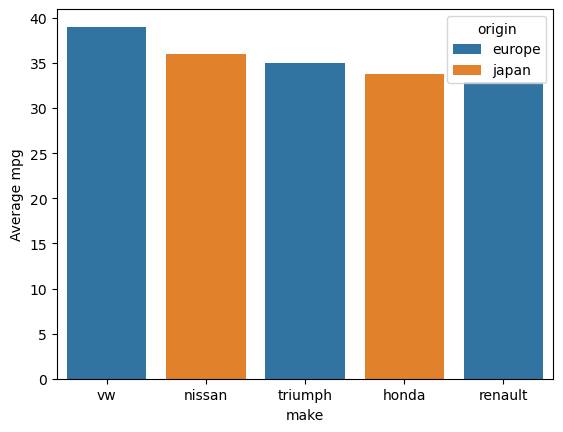

In [246]:
sns.barplot(makes_avg_mpg, x="make", y="mpg", hue="origin").set(ylabel="Average mpg")

### Here we see the top 5 vehicle makes for their fuel economy. 3 of them are made in Europe and 2 are made in Japan.

# What kind of relationship exists between number of cylinders and fuel economy?

<Axes: xlabel='cylinders', ylabel='mpg'>

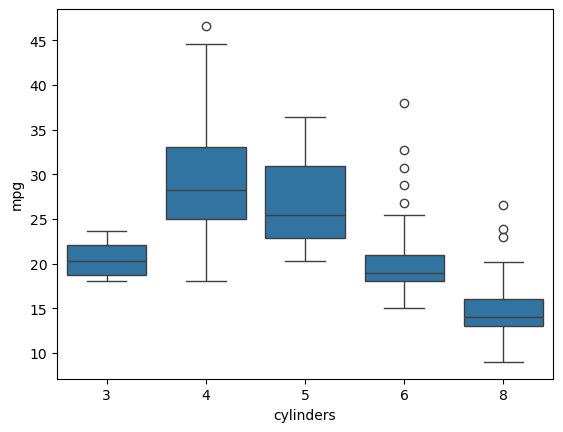

In [274]:
sns.boxplot(data=mpg, x="cylinders", y="mpg")

### Appears that there is a negative relationship between the number of cylinders and fuel economy.
### Vehicles with 3 cylinders show to to be the outlier to this rule, having lower fuel economy than vehicles with 4 cylinders.